In [2]:
from tqdm import tqdm
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

In [3]:
# !pip install medmnist

In [4]:
import medmnist

In [5]:
from medmnist import INFO, Evaluator

In [6]:
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

MedMNIST v2.0.2 @ https://github.com/MedMNIST/MedMNIST/


In [7]:
!python -m medmnist available

MedMNIST v2.0.2 @ https://github.com/MedMNIST/MedMNIST/
All available datasets:
	pathmnist
	chestmnist
	dermamnist
	octmnist
	pneumoniamnist
	retinamnist
	breastmnist
	bloodmnist
	tissuemnist
	organamnist
	organcmnist
	organsmnist
	organmnist3d
	nodulemnist3d
	adrenalmnist3d
	fracturemnist3d
	vesselmnist3d
	synapsemnist3d


In [8]:
data_flag = 'retinamnist'
info = INFO[data_flag]

In [9]:
info

{'python_class': 'RetinaMNIST',
 'description': 'The RetinaMNIST is based on the DeepDRiD challenge, which provides a dataset of 1,600 retina fundus images. The task is ordinal regression for 5-level grading of diabetic retinopathy severity. We split the source training set with a ratio of 9:1 into training and validation set, and use the source validation set as the test set. The source images of 3×1,736×1,824 are center-cropped and resized into 3×28×28.',
 'url': 'https://zenodo.org/record/5208230/files/retinamnist.npz?download=1',
 'MD5': 'bd4c0672f1bba3e3a89f0e4e876791e4',
 'task': 'ordinal-regression',
 'label': {'0': '0', '1': '1', '2': '2', '3': '3', '4': '4'},
 'n_channels': 3,
 'n_samples': {'train': 1080, 'val': 120, 'test': 400},
 'license': 'CC BY 4.0'}

In [10]:
n_channels = info['n_channels']
n_classes = len(info['label'])

n_channels, n_classes

(3, 5)

In [11]:
DataClass = getattr(medmnist, info['python_class'])

In [12]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

In [13]:
download = True

train_dataset = DataClass(split='train', transform=data_transform, download=download)
val_dataset = DataClass(split='val', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

Using downloaded and verified file: /Users/michaelka/.medmnist/retinamnist.npz
Using downloaded and verified file: /Users/michaelka/.medmnist/retinamnist.npz
Using downloaded and verified file: /Users/michaelka/.medmnist/retinamnist.npz


In [14]:
len(train_dataset), len(val_dataset), len(test_dataset)

(1080, 120, 400)

In [15]:
print(train_dataset)

Dataset RetinaMNIST (retinamnist)
    Number of datapoints: 1080
    Root location: /Users/michaelka/.medmnist
    Split: train
    Task: ordinal-regression
    Number of channels: 3
    Meaning of labels: {'0': '0', '1': '1', '2': '2', '3': '3', '4': '4'}
    Number of samples: {'train': 1080, 'val': 120, 'test': 400}
    Description: The RetinaMNIST is based on the DeepDRiD challenge, which provides a dataset of 1,600 retina fundus images. The task is ordinal regression for 5-level grading of diabetic retinopathy severity. We split the source training set with a ratio of 9:1 into training and validation set, and use the source validation set as the test set. The source images of 3×1,736×1,824 are center-cropped and resized into 3×28×28.
    License: CC BY 4.0


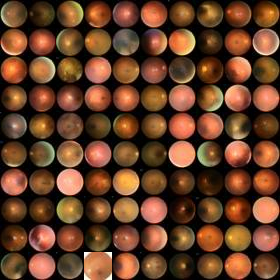

In [16]:
train_dataset.montage(length=10)

In [17]:
x, y = train_dataset[0]

In [18]:
x.shape, y

(torch.Size([3, 28, 28]), array([0]))

In [19]:
import matplotlib.pyplot as plt

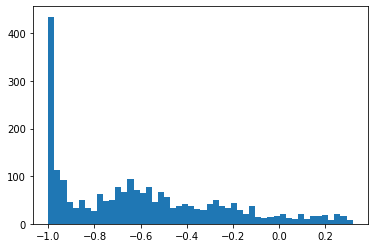

In [20]:
plt.hist(np.array(x).reshape(-1), bins=50)
plt.show()

In [21]:
train_dataset.labels.shape

(1080, 1)

(array([486.,   0., 128.,   0.,   0., 206.,   0., 194.,   0.,  66.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

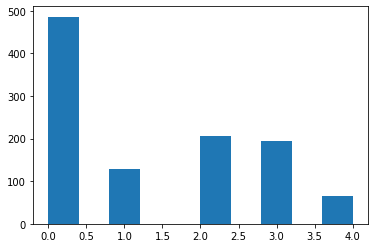

In [22]:
plt.hist(train_dataset.labels.reshape(-1), bins=10)
# plt.show()

In [24]:
train_dataset.labels[:10]

array([[0],
       [0],
       [0],
       [4],
       [3],
       [0],
       [4],
       [0],
       [3],
       [2]], dtype=uint8)

In [108]:
new_dataset.info

{'python_class': 'RetinaMNIST',
 'description': 'The RetinaMNIST is based on the DeepDRiD challenge, which provides a dataset of 1,600 retina fundus images. The task is ordinal regression for 5-level grading of diabetic retinopathy severity. We split the source training set with a ratio of 9:1 into training and validation set, and use the source validation set as the test set. The source images of 3×1,736×1,824 are center-cropped and resized into 3×28×28.',
 'url': 'https://zenodo.org/record/5208230/files/retinamnist.npz?download=1',
 'MD5': 'bd4c0672f1bba3e3a89f0e4e876791e4',
 'task': 'ordinal-regression',
 'label': {'0': '0', '1': '1', '2': '2', '3': '3', '4': '4'},
 'n_channels': 3,
 'n_samples': {'train': 1080, 'val': 120, 'test': 400},
 'license': 'CC BY 4.0'}

In [66]:
DataClass = getattr(medmnist, info['python_class'])
DataClass

medmnist.dataset.RetinaMNIST

In [55]:
# RetinaMNIST

class LabelBinRetinaMNIST(medmnist.dataset.RetinaMNIST):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)      
        n_classes = len(self.info['label'])     
        self.n_bins = n_classes-1
        
    def __getitem__(self, index):      
        img, target = super().__getitem__(index)
        
        # target: np.array of L (L=1 for single-label)
        target = target[0]
              
        label = np.zeros(self.n_bins).astype(np.float32)       
        label[:target] = 1.
        
        return img, label

In [58]:
new_dataset = LabelBinRetinaMNIST(split='train', transform=data_transform, download=download)

Using downloaded and verified file: /Users/michaelka/.medmnist/retinamnist.npz


In [62]:
img, label = new_dataset[4]
label

array([1., 1., 1., 0.], dtype=float32)